In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def next_batch(features, labels, batch_size):
  
    batch_list = []
    for data in np.arange(start=0, stop=np.shape(features)[0], step=batch_size):
        batch_list.append((features[data: data + batch_size],
                           labels[data: data + batch_size]))
 
    return batch_list

In [3]:
def stochastic_gradient_descent(X, y, alpha=0.01, epochs=100, batch_size=1):
    
 
    m = np.shape(X)[0]  # total number of samples
    n = np.shape(X)[1]  # total number of features
 
    X = np.concatenate((np.ones((m, 1)), X), axis=1)
    W = np.random.randn(n + 1, )
 
    # stores the updates on the lost/cost function
    cost_history_list = []
    
    # iterate until the maximum number of epochs
    for current_iteration in np.arange(epochs):  # begin the process
 
        # save the total lost/cost during each batch
        batch_epoch_loss_list = []
 
        for (X_batch, y_batch) in next_batch(X, y, batch_size):
            # current size of the feature batch
            batch_m = np.shape(X_batch)[0]
 
            # compute the dot product between our
            # feature 'X_batch' and weight theta
            y_estimated = X_batch.dot(W)
 
            # calculate the difference between the actual
            # and estimated value
            error = y_estimated - y_batch
 
            # get the cost (Mean squared error -MSE)
            cost = (1 / 2 ) * np.sum(error ** 2)
 
            batch_epoch_loss_list.append(cost)  # save it to a list
 
            # Update our gradient by the dot product between the
            # transpose of 'X_batch' and our error divided by the
            # few number of samples
            gradient = X_batch.T.dot(error)
 
            # Now we have to update our weights
            W = W - alpha * gradient
 
        # Let's print out the cost to see how these values
        # changes after every each iteration
        print(f"cost:{np.average(batch_epoch_loss_list)} \t"
              f" iteration: {current_iteration}")
 
        # keep track of the cost
        cost_history_list.append(np.average(batch_epoch_loss_list))
 
    # return both our weight and list of cost function changing overtime
    return W, cost_history_list

cost:5.6734326291147726e+32 	 iteration: 0
cost:7.203921373118124e+61 	 iteration: 1
cost:9.147281115800538e+90 	 iteration: 2
cost:1.161488965214295e+120 	 iteration: 3
cost:1.4748170513577916e+149 	 iteration: 4
cost:1.872669823061459e+178 	 iteration: 5
cost:2.3778490104765232e+207 	 iteration: 6
cost:3.0193074331601644e+236 	 iteration: 7
cost:3.833808343494983e+265 	 iteration: 8
cost:4.868032401479576e+294 	 iteration: 9


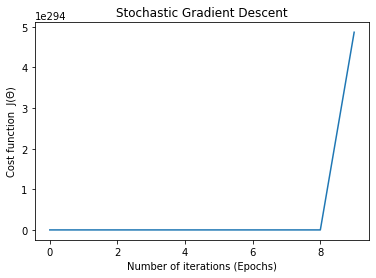

In [4]:
def main():
    rng = np.random.RandomState(10)
    X = 10 * rng.rand(1000, 5)  # feature matrix
    y = 0.9 + np.dot(X, [2.2, 4., -4, 1, 2])  # target vector
 
    # calls the stochastic gradient descent method
    weight, cost_history_list = stochastic_gradient_descent(X, y,
                                                            alpha=0.001,
                                                            epochs=10,
                                                            batch_size=32
                                                           )
 
    # visualize how our cost decreases over time
    plt.plot(np.arange(len(cost_history_list)), cost_history_list)
    plt.xlabel("Number of iterations (Epochs)")
    plt.ylabel("Cost function  J(Θ)")
    plt.title("Stochastic Gradient Descent")
    plt.show()
 
 
if __name__ == '__main__':
    main()

## Advantages of Stochastic Gradient Descent

Usually in practice, stochastic gradient descent is often preferred if we have:

Lots of data: Stochastic gradient descent has better speed properties because we don’t have to touch all \(m\) datapoints before updating our \(\theta\) parameter once.
 Computationally fast:  Updating our parameter is done quickly after seeing a few data points before modifying it.
 
## Drawbacks of Stochastic Gradient Descent
Nonetheless, since the procedure is random, it can be:

Harder to Debug: Difficulty in assessing convergence.
Harder to know when to stop: Stopping conditions may be harder to evaluate.
